# PROJECT 2-- Clustering and Differential Gene Expression

<b>Scientific Question:</b> What pathway is a key mediator in inducing the phenotype of chronic inflammation in patients with NASH?

<b>BACKGROUND:</b> Nonalcoholic steatohepatitis is liver inflammation and damage caused by a buildup of fat in the liver (derived from NAFLD or nonalcoholic fatty liver disease). One may have a fatty liver but not necessarily suffer from NASH. This project strives to determine the driving factors and changes in gene expression from healthy controls vs those with steatohepatitis. 
There has been extensive research on the differential gene expression between those with NASH vs healthy individuals. Govaare et al. determined 25 differentially expressed genes as fibrosing steatohepatitis progressed  to NASH, that circulating concentrations of AKR1B10 and GDF15 were strongly associated with fibrosis sstage and disease severity, and that GDF15 supplementation tempered inflammatory response in macrophages upon LPS treatment of macrophages (1). Shiba et al. also found that treatment with an SGLT2 inhibitory (antidiabetic drug), CANA, with a western diet fed MC4R KO (NASH mouse model) downregulated the proinflammatory cytokine TNF-a (2). Treatment also downregulated the proinflammatory M1 macrophage biomarker Cd11c in the liver of the western diet fed MC4R-KO mice while also suppressing the ratio of oxidative to reduced forms of glutathiones (2). Thus, these two papers have elucidated the significance of inflammation in the etiology of NASH. 

Works cited: 
1. Govaere, Transcriptomic profiling across the nonalcoholic fatty liver disease spectrum reveals gene signatures for steatohepatitis and fibrosis, 2020, https://stm.sciencemag.org/content/12/572/eaba4448/tab-pdf, science 
2. Shiba, Canagliflozin, an SGLT2 inhibitor, attenuates the development of hepatocellular carcinoma in a mouse model of human NASH, https://www.nature.com/articles/s41598-018-19658-7, Nature

More background information can be found on the following document:
https://drive.google.com/file/d/1sBtxsiw2Vvigo33xEHkU-vtaOEJaEMXV/view?usp=sharing

# Hypothesis: if a patient has NASH, there will be an observable increase in TNF-a expression

Previous research has elucidated the significance of inflammation in the etiology of NASH from NAFLD. What are the biomarkers that induce the phenotype of inflammation and the consequential fibrosis and cirhossis of the liver? I hypothesize that it is the proinflammatory cytokine TnfA. 

To answer this question, I first obtained the processed 10x genomics data set containing the matrix, barcodes, and features in .mtx, .tsv, and .tsv files, respectively. 

<b> READ ME </b>

SAMPLES: https://www.ncbi.nlm.nih.gov/gds/?term=GSE129516[ACCN]%20AND%20gsm[ETYP] each barcode, matrix, and features file for controls1-3 and nash1-3 were found here: https://www.ncbi.nlm.nih.gov/gds/?term=GSE129516[ACCN]%20AND%20gsm[ETYP] http://128.197.168.11/kkarri/NASH/data/

Because the purpose of this project was to determine differential gene expression of proinflammatory biomarkers, I decided to use processed matrix data over raw FASTQ files. All processed files can be found above. I used many resources to determine differential gene expression, including the folloowing:

https://www.youtube.com/watch?v=aZIauqUp0oQ&ab_channel=RebeccaJCarlson https://pachterlab.github.io/kallistobustools/tutorials/kb_kite/python/kb_kite/ https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/00-tabula-muris.html

The output of this code are multiple graphs as png files:

violin plot for n_counts of gene and log of n_counts
histogram for cell quality controls
scatter plot where x axis is mean expression of genes and y axis is dispersion of genes (normalized), where second graph has nonnormalized values on y axis
PCA plot of Tnfsf18
UMAP of Tnfsf4, Tnfsf18, Tnfsf10 (similar gene expression)
clustering by partitioning N cells into k clusters
violin plot of Prex2 and Il17a which exhibit differential expression when computing by leiden algorithm

# Part 1: Load the Packages

Packages loaded include the following: 
1. Pandas are an easy way to organize matrices by column and index. 
2. Scanpy is a toolkit for analyzing single-cell gene expression data
3. anndata provides a scalable way of keeping track of data and learned annotations. Learn more here: https://anndata.readthedocs.io/en/latest/
4. Numpy: Another easy way to organize matrices by arrays
5. Leiden algorithm: Community detection to understand the structure of large and complex networks; algorithm used for clustering for this project. Learn more here: https://www.nature.com/articles/s41598-019-41695-z

In [146]:
import pandas as pd
import anndata
import numpy as np
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file='NASH_RESULTS_FILE.h5ad'

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.9.4


# Part 2: Load in the data
Data for each mouse and its experimental condition was stored as its individual file. For example, the control mouse was stored as "control 1", with each file containing the features.tsv, barcodes.tsv, and matrix.mtx. The features file contains a matrix containing the "feature" or gene. The barcode contains the sequence, and the matrix contains the detected cellular barcodes. More information on the feature-barcode matrices and workflow/pipeline are provided on the 10x genomics site: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/matrices
In the code below, we read each experimental condition which are conducted in biological triplicates. The controls are placed on the regular CHOW diet while the experimentals are placed on the AMLN diet, which induces mouse-modeled NASH. 
The files are loaded into adata file as NASH_NEW.h5ad

In [150]:
#controls 1
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/chow1/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]
#controls 2
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/chow2/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]
#controls 3
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/chow3/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]
#nash 1
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/liver1/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]
#nash 2
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/liver2/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]
#nash 3
path="/Users/eunicechoi/BIMM_143/BIMM143 ASSIGNMENTS_PYTHON/OLD_FILES_PROJECT 2/project 2/liver3/"
adata=sc.read(path+'matrix.mtx', cache=True).T
adata.var_names=pd.read_csv(path+'features.tsv', header=None, sep='\t')[1]
adata.obs_names=pd.read_csv(path+'barcodes.tsv', header=None)[0]

... reading from cache file cache/Users-eunicechoi-BIMM_143-BIMM143 ASSIGNMENTS_PYTHON-OLD_FILES_PROJECT 2-project 2-chow2-matrix.h5ad
... reading from cache file cache/Users-eunicechoi-BIMM_143-BIMM143 ASSIGNMENTS_PYTHON-OLD_FILES_PROJECT 2-project 2-chow3-matrix.h5ad
... reading from cache file cache/Users-eunicechoi-BIMM_143-BIMM143 ASSIGNMENTS_PYTHON-OLD_FILES_PROJECT 2-project 2-liver1-matrix.h5ad
... reading from cache file cache/Users-eunicechoi-BIMM_143-BIMM143 ASSIGNMENTS_PYTHON-OLD_FILES_PROJECT 2-project 2-liver2-matrix.h5ad
... reading from cache file cache/Users-eunicechoi-BIMM_143-BIMM143 ASSIGNMENTS_PYTHON-OLD_FILES_PROJECT 2-project 2-liver3-matrix.h5ad


In [151]:
adata.write('NASH_NEW.h5ad')


In [152]:
adata = anndata.read_h5ad('NASH_NEW.h5ad')
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 6593 × 37514

In [153]:
adata.var_names_make_unique()

# Part 3: Data filtering and counting
Quality control is important to deter downstream technical noise which may obscure biological signals of interest in downstream analysis. We will filter cell outliers based on counts and numbers of genes expressed 
Only keeping cells with at least "min_counts_ counts or "min_genes" genes expressed. This filters measurement outliers or noise. 


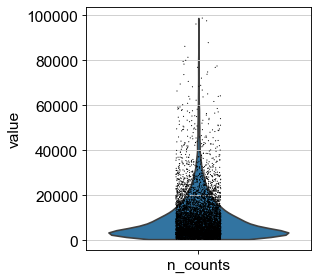

In [154]:
sc.pp.filter_cells(adata, min_counts=0)
sc.pp.filter_genes(adata, min_counts=0)
sc.pl.violin(adata, keys='n_counts')

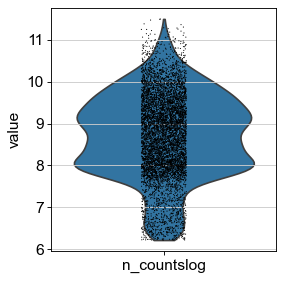

Index(['AAACCCAAGCTTGTTG-1', 'AAACCCAAGTTCTACG-1', 'AAACCCAAGTTGAAGT-1',
       'AAACCCACAAGCGCTC-1', 'AAACCCACAATCTCGA-1', 'AAACCCACACGCGGTT-1',
       'AAACCCAGTGGCCCAT-1', 'AAACCCATCACCCTTG-1', 'AAACCCATCTAAGCCA-1',
       'AAACGAAAGACCAGCA-1',
       ...
       'TTTGGTTGTGACCGTC-1', 'TTTGGTTGTTACACAC-1', 'TTTGGTTTCGTAGCTA-1',
       'TTTGGTTTCGTGGACC-1', 'TTTGTTGAGCTTCTAG-1', 'TTTGTTGAGGTTCACT-1',
       'TTTGTTGCAACGCATT-1', 'TTTGTTGCAGGCGTTC-1', 'TTTGTTGTCCGCAACG-1',
       'TTTGTTGTCGCACGGT-1'],
      dtype='object', length=6593)

In [155]:
adata.obs['n_countslog'] = np.log1p(adata.obs['n_counts'])
sc.pl.violin(adata, keys='n_countslog')
adata.obs.index

filtered out 384 cells that have less than 1000 counts


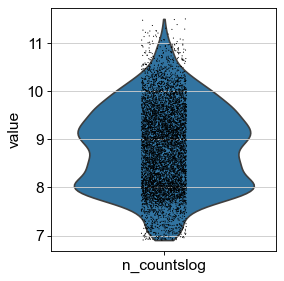

AnnData object with n_obs × n_vars = 6209 × 37514
    obs: 'n_counts', 'n_countslog'
    var: 'n_counts'

In [156]:
sc.pp.filter_cells(adata, min_counts=1000)
sc.pl.violin(adata, keys='n_countslog', title="kallisto UMI counts")
adata

In [157]:
import sys
!{sys.executable} -m pip install leidenalg

You should consider upgrading via the '/Users/eunicechoi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [158]:
#read clustering data

adata = sc.read_h5ad('NASH_NEW.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [159]:
adata.var_names_make_unique()

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19 cells that have less than 200 genes expressed
filtered out 14846 genes that are detected in less than 3 cells


In [160]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

In [161]:
data=sc.pp.calculate_qc_metrics(adata)

In [162]:
cell_qc_dataframe=data[0]
gene_qc_dataframe=data[1]

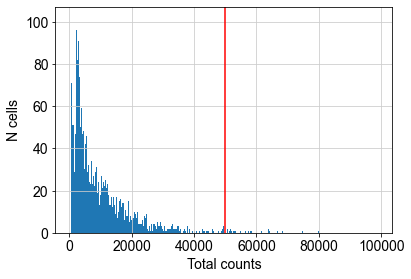

In [163]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')


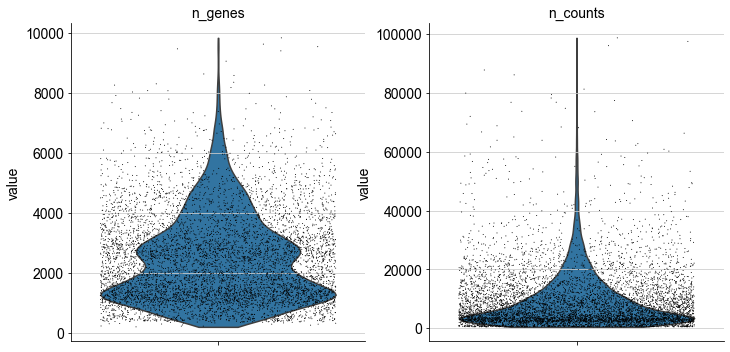

In [164]:
#mito_genes=[name for name in adata.var_names if name.startswith('MT-')]
#for each cell compute fxn of counts in mito vs all genes
#adata.obs['percent_mito']=np.sum(adata[:, mito_genes].X, axis=1).A1/np.sum(adata.X, axis=1).A1

adata.obs['n_counts']=adata.X.sum(axis=1).A1

#check number of genes, UMI counts, and percent mito for all cells

sc.pl.violin(adata, ['n_genes', 'n_counts'], jitter=0.4, multi_panel=True)

#remove cells with too many genes or percent mitochondrial genes

adata=adata[adata.obs['n_genes']<2500, :]
#adata=adata[adata.obs['percent_mito']<0.05, :]
adata.raw=sc.pp.log1p(adata, copy=True) #set .raw attribute of anndata object
#to log raw gene expression


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:01)


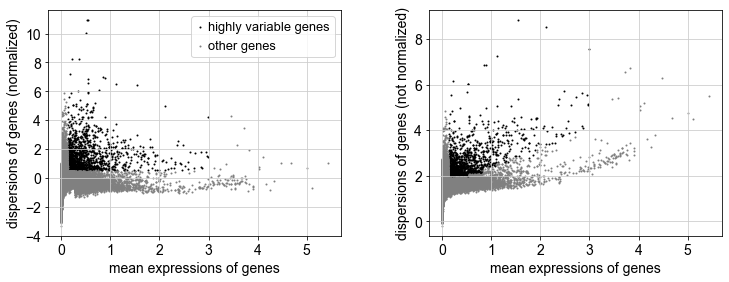

/Users/eunicechoi/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:08)


In [165]:
#per cell normalization of data matrix X to determine differential genes

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
filter_result=sc.pp.filter_genes_dispersion(adata.X, min_mean=0.125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
#OUTPUT MEANS THAT ~15.4% OF GENES ARE HIGHLY VARIABLE=> filter out nonvariable genes

#percent of genes that are highly variable:
sum(filter_result.gene_subset)/len(filter_result.gene_subset)*100

#filter out nonvariable genes; view highly variable genes
adata=adata[:, filter_result.gene_subset]
adata.shape[1]

sc.pp.log1p(adata) #logarithmize dataset

#regress out effects of total counts per cell and % mitochondrial genes expressed; scale data to unit variance

sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata, max_value=10)
adata.write(results_file)

# 3. Dimensionality reduction by PCA and UMAP
<b>purpose:</b> Seeks to take large set of variables and return a smaller set of components that still contain most of the information present in the original data set. 
1. PCA: Mathematical procudure that transforms correlated variables into uncorrelated variables called principal components. 
2. UMAP is a nonlinear dimensionality reduction. UMAP tries to balance the preservation of local and global structure and is based upon the NEIGHBOR graph 

All information provided for UMAP and PCA was provided here: https://chanzuckerberg.github.io/scRNA-python-workshop/analysis/03-dimensionality-reduction.html


computing PCA
    with n_comps=50
    finished (0:00:00)


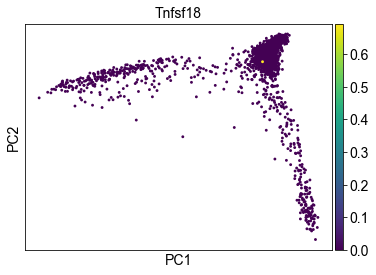

In [166]:
sc.tl.pca(adata)
adata.obsm['X_pca']*=-1
sc.pl.pca_scatter(adata, color='Tnfsf18')

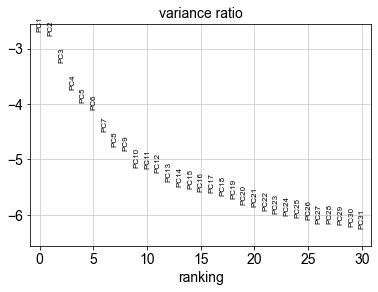

In [167]:
sc.pl.pca_variance_ratio(adata, log=True)

In [168]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 3696 × 1569
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


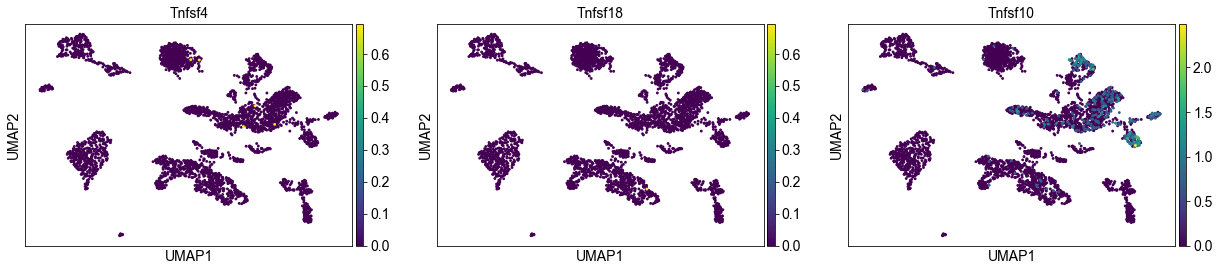

In [169]:
#UMAP; ANOTHER DIMENSIONALITY REDUCTION TECHNIQUE

adata=sc.read(results_file)
sc.pp.neighbors(adata, n_neighbors=10)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['Tnfsf4', 'Tnfsf18', 'Tnfsf10'])
#clustering of the three signified genes

#each dot = single cell
#for each cluster, the closer, the more similar
#shows that each cell has different transcriptomic profile

In [170]:
adata.write('NASH_UMAP.h5ad')

# 4. Clustering by k-means clustering and LEIDEN community detection algorithm
<b> purpose: </b> Groups cells based on their expression profiles to identify cell states and infer differences between groups. This is the foundation to elucidate differences in gene expression. We explored both <b>k-means clustering</b>  which is of the unsupervised clustering. We also explored <b>community detection</b> by Leiden algorithm. 


1. K-Means clustering

In [172]:
#k-means clustering first:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

adata = sc.read('NASH_UMAP.h5ad')

... storing 'kmeans' as categorical


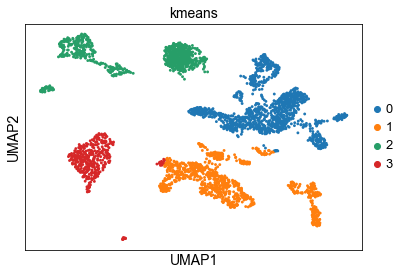

In [173]:
#goal: partition N cells into k clusters
umap_coordinates = adata.obsm['X_umap'] # extract the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates) # fix the random state for reproducibility

adata.obs['kmeans'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') # plot the results

2. Leiden community detection algorithm 

In [174]:
#for some reason, pip not installing leiden alg and making it accessible by jupyter so i directly download here
import sys
!{sys.executable} -m pip install leidenalg

You should consider upgrading via the '/Users/eunicechoi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


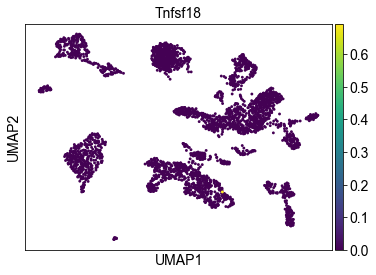

In [175]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color='Tnfsf18')


# 5. Violin plot by differential expression of Prex2 and Il17a

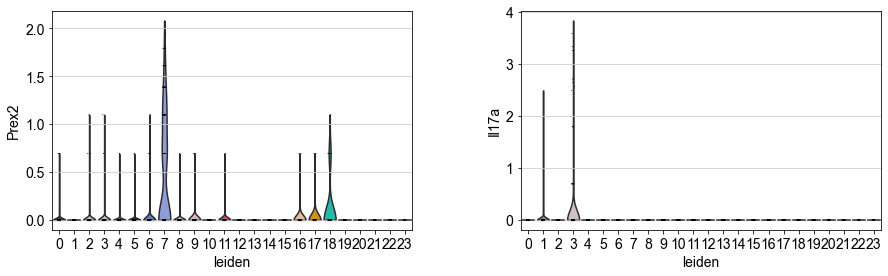

In [179]:
sc.pl.violin(adata, keys=list(adata.var.index[:2]), groupby='leiden')

# 6. Analysis of results
The violin plot above shows differential expression of two genes: Prex2 and Il17a. 
Prex2 activates the PI3K signaling pathway and has been shown to inhibit GEF activity. This gene plays a role in insulin-signaling pathways and plays a significant physiological role in the regulation of glucose homeostasis (https://www.repository.cam.ac.uk/handle/1810/302000). Il17a is associated with arthritis and bronchiolitis obliterans (https://www.genecards.org/cgi-bin/carddisp.pl?gene=IL17A#:~:text=IL17A%20(Interleukin%2017A)%20is%20a,this%20gene%20include%20cytokine%20activity.) and thus is closely related to proinflammation. Interestingly, signals via Il17 leads to downstream TRAF6 activation of NF-KB and thus triggers strong immune inflammation connecting T-cell mediated adaptive immunity and acute inflammatory response. These results show that inflammation indeed plays a significant role in the pathology of NASH by upstream cytokines like IL17A to produce downstream proinflammatory signaling by NF-KB <b>(which is by TNF-a activation!)  </b> 
The results seem to be in agreement with my scientific hypothesis in that the etiology of NASH is intimately mediated by TNF.